In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df=pd.read_csv("cluster_moons.csv")

In [5]:
#We want to use DBSCAN for unsupervised learning and campare it's performance with a KMeans clustering model

In [7]:
#Let's first explore our data and see if it has disinct features

In [13]:
df.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   X2      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


In [15]:
df.describe()

,X1,X2
count,1500.000000,1500.000000
mean,0.498501,0.251743
std,0.868054,0.496365
min,-1.112339,-0.628397
25%,-0.036013,-0.202562
50%,0.497101,0.246369
75%,1.037322,0.718451
max,2.095098,1.119580


<Axes: xlabel='X1', ylabel='X2'>

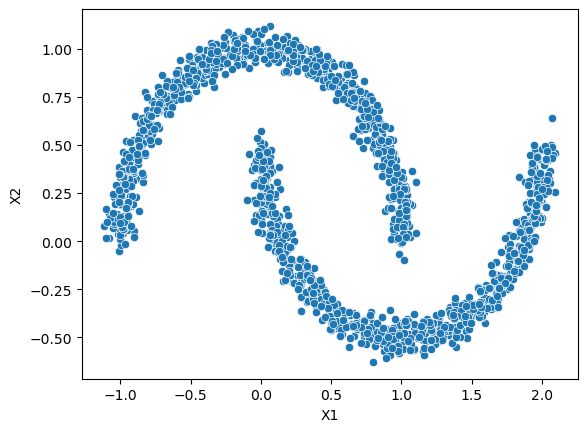

In [16]:
sns.scatterplot(data=df,x="X1",y="X2")

In [17]:
#We can see two distinct clusters,lets see if we can identify them using KMeans clustering

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

In [30]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [22]:
KM=KMeans(n_clusters=2)

In [37]:
def fit_display(data,model):
    labels=model.fit_predict(data)
    sns.scatterplot(data=df,x="X1",y="X2",hue=labels)

C:\Users\17573\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\17573\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


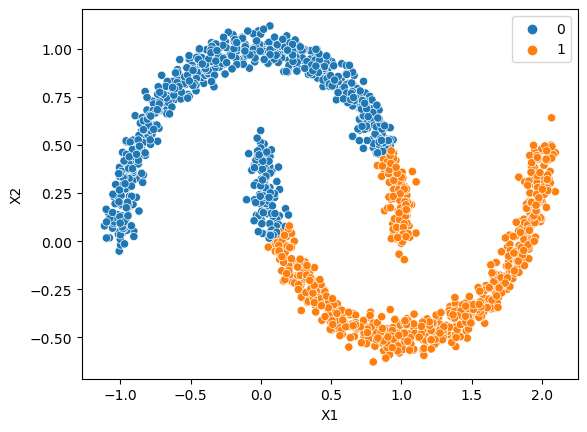

In [38]:
fit_display(df_scaled,KM)

In [40]:
#The reason that KMeans clustering didn't identify correct clusters even with setting(n_clusters=2  is that it is based on distance metric

In [41]:
#Now let's use DBSCAN instead 
#to choose best parameters we look at number of outliers for different parameter values

In [105]:
n_outliers=[]

for eps in np.linspace(0.001,5,500):

    model=DBSCAN(eps=eps)
    labels=model.fit_predict(df_scaled)
    n_outliers.append(np.sum(labels==-1))  

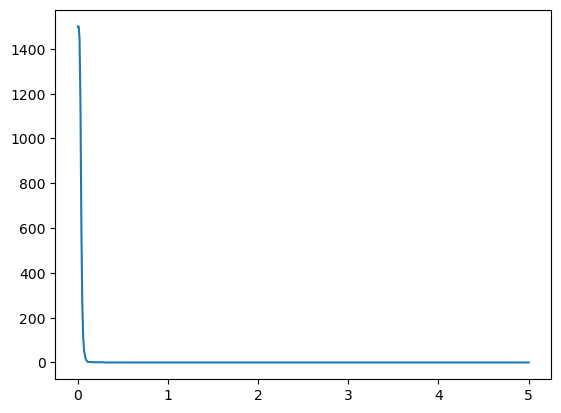

In [107]:
plt.plot(np.linspace(0.001,5,500),n_outliers)

(0.0, 5.0)

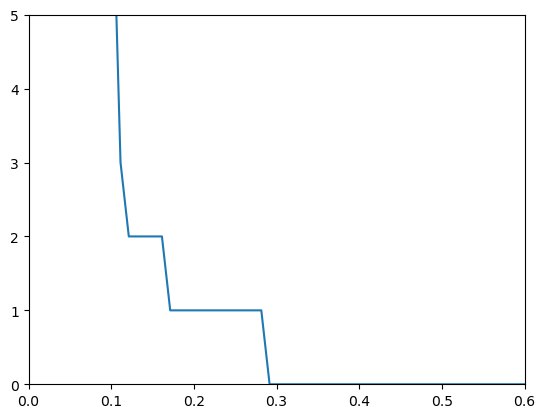

In [106]:
plt.plot(np.linspace(0.001,5,500),n_outliers)
plt.xlim(0,0.6)
plt.ylim(0,5)

In [90]:
#We can see that for eps values less than 0.15 the number of outliers drasicly increases so we should choose values >= 0.15
#Based on data plots above there are few outliers and we will choose eps=0.3
#there is no drastic change for eps>0.15

#similarly we can sudy number of min_samples

In [123]:
n_outliers_samp=[]

for N_samples in np.arange(1,200):

    model=DBSCAN(min_samples=N_samples)
    labels=model.fit_predict(df_scaled)
    n_outliers_samp.append(np.sum(labels==-1))
    

(0.0, 100.0)

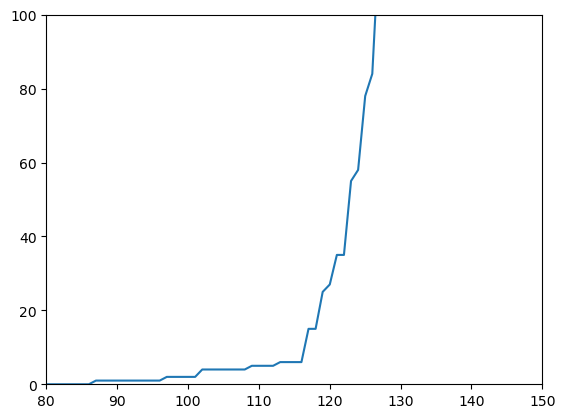

In [149]:
plt.plot(np.arange(1,200),n_outliers_samp)
plt.xlim(80,150)
plt.ylim(0,100)

In [151]:
# As you increase threshold  min number of samples  more points get classified as outliers
#Good starting point for min_samples for determining core point
min_samp=2*df_scaled.shape[1] #This is a good choice for 

In [153]:
DB=DBSCAN(eps=0.3,min_samples=min_samp)

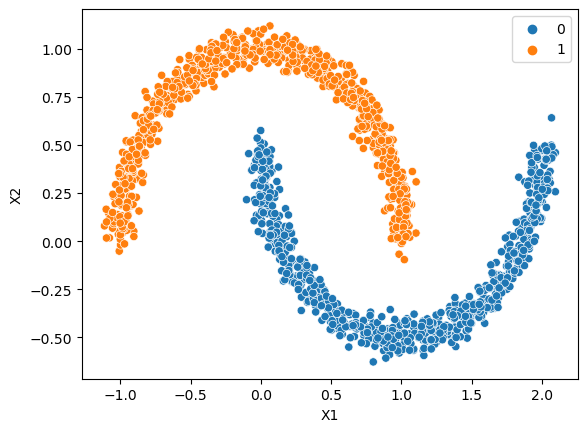

In [154]:
fit_display(df_scaled,DB)

In [ ]:
#We can see that DBSCAN performs well